In [104]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from string import punctuation
from string import digits
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
#import csv file
df=pd.read_excel("Tweets.xlsx")

In [53]:
#showing data
df

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [54]:
#puncuate the tweet text to normal text that we can easily check the sentiment polarity
tw=[]
for i in df["text"]:
    res = (re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|''(?:%[0-9a-fA-F][0-9a-fA-F]))+','', i))
    remove_digits = str.maketrans('', '', digits)
    j = res.translate(remove_digits)
    remove_punc = str.maketrans('', '', punctuation)
    k = j.translate(remove_punc) 
    tw.append(str(k))

In [56]:
#concatinate tw column to the dataframe df
df["TWEETS1"]=np.array(tw)

In [57]:
df

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,TWEETS1
0,570306133677760513,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),VirginAmerica What dhepburn said
1,570301130888122368,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),VirginAmerica plus youve added commercials to ...
2,570301083672813571,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),VirginAmerica I didnt today Must mean I need t...
3,570301031407624196,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),VirginAmerica its really aggressive to blast o...
4,570300817074462722,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),VirginAmerica and its a really big bad thing a...
5,570300767074181121,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),VirginAmerica seriously would pay a flight fo...
6,570300616901320704,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),VirginAmerica yes nearly every time I fly VX t...
7,570300248553349120,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),VirginAmerica Really missed a prime opportunit...
8,570299953286942721,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),virginamerica Well I didnt…but NOW I DO D
9,570295459631263746,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),VirginAmerica it was amazing and arrived an ho...


In [58]:
#calculate the sentiment polarity of the text
senti=[]
Count=[]
number=1
for i in df['TWEETS1']:
    m=TextBlob(i)
    senti.append(m.sentiment.polarity)
    Count.append(number)
    number=number+1

In [202]:
df

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,TWEETS1,sentiment_polarity1,sentiment
0,570306133677760513,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),VirginAmerica What dhepburn said,0.000000e+00,neutral
1,570301130888122368,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),VirginAmerica plus youve added commercials to ...,0.000000e+00,neutral
2,570301083672813571,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),VirginAmerica I didnt today Must mean I need t...,-3.125000e-01,negative
3,570301031407624196,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),VirginAmerica its really aggressive to blast o...,6.250000e-03,positive
4,570300817074462722,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),VirginAmerica and its a really big bad thing a...,-3.500000e-01,negative
5,570300767074181121,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),VirginAmerica seriously would pay a flight fo...,-2.083333e-01,negative
6,570300616901320704,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),VirginAmerica yes nearly every time I fly VX t...,4.500000e-01,positive
7,570300248553349120,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),VirginAmerica Really missed a prime opportunit...,2.000000e-01,positive
8,570299953286942721,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),virginamerica Well I didnt…but NOW I DO D,0.000000e+00,neutral
9,570295459631263746,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),VirginAmerica it was amazing and arrived an ho...,4.666667e-01,positive


In [60]:
#checking the length of the output of sentiment poloarity
len(senti)

14640

In [143]:
#adding output column to the dataframe df
df["sentiment_polarity1"]=np.array(senti)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 12 columns):
tweet_id               14640 non-null int64
airline                14640 non-null object
name                   14640 non-null object
retweet_count          14640 non-null int64
text                   14640 non-null object
tweet_coord            1019 non-null object
tweet_created          14640 non-null object
tweet_location         9907 non-null object
user_timezone          9820 non-null object
TWEETS1                14640 non-null object
sentiment_polarity1    14640 non-null float64
sentiment              14640 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB


In [67]:
#assigning the postive,negative and neutal values according to the sentiment polarity 
b=[]
for a in df['sentiment_polarity1']:
    if a > 0:
        b.append('positive')
    elif a == 0:
        b.append('neutral')
    else:
        b.append('negative')
b    

['neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'n

In [68]:
#adding column to data frame
df['sentiment']=b

In [203]:
df

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,TWEETS1,sentiment_polarity1,sentiment
0,570306133677760513,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),VirginAmerica What dhepburn said,0.000000e+00,neutral
1,570301130888122368,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),VirginAmerica plus youve added commercials to ...,0.000000e+00,neutral
2,570301083672813571,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),VirginAmerica I didnt today Must mean I need t...,-3.125000e-01,negative
3,570301031407624196,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),VirginAmerica its really aggressive to blast o...,6.250000e-03,positive
4,570300817074462722,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),VirginAmerica and its a really big bad thing a...,-3.500000e-01,negative
5,570300767074181121,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),VirginAmerica seriously would pay a flight fo...,-2.083333e-01,negative
6,570300616901320704,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),VirginAmerica yes nearly every time I fly VX t...,4.500000e-01,positive
7,570300248553349120,Virgin America,pilot,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada),VirginAmerica Really missed a prime opportunit...,2.000000e-01,positive
8,570299953286942721,Virgin America,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada),virginamerica Well I didnt…but NOW I DO D,0.000000e+00,neutral
9,570295459631263746,Virgin America,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada),VirginAmerica it was amazing and arrived an ho...,4.666667e-01,positive


In [204]:
#save tha output file to csv
df.to_csv("airline.csv",index=False,header=True)

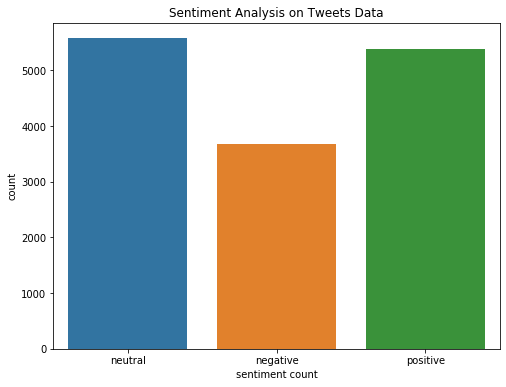

In [150]:
#count plot showing sentiment analysis on tweets
plt.figure(figsize=(8,6))
sns.countplot(b)
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on Tweets Data")
plt.show()

# sentiment count for the airline tweets

In [127]:
#sentiment count for the airline tweets
df["sentiment"].value_counts()

neutral     5578
positive    5378
negative    3684
Name: sentiment, dtype: int64

In [119]:
#these are the airlines company on which tweets has been posted
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

# United Airline tweets

In [132]:
#analysis on paticular airline
#first we select united airline
united=df[df['airline'].str.contains('United')]

In [134]:
#tweets count
united["sentiment"].value_counts()

neutral     1377
positive    1342
negative    1103
Name: sentiment, dtype: int64

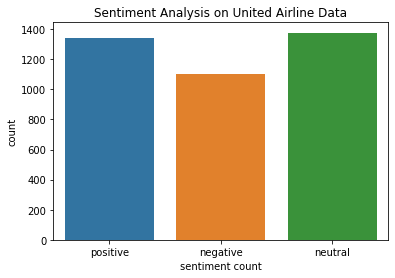

In [159]:
sns.countplot(x=united["sentiment"])
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on United Airline Data")
plt.show()


# US airways airline tweets

In [165]:
us=df[df['airline'].str.contains('US Airways')]

In [167]:
us["sentiment"].value_counts()

neutral     1086
positive     924
negative     903
Name: sentiment, dtype: int64

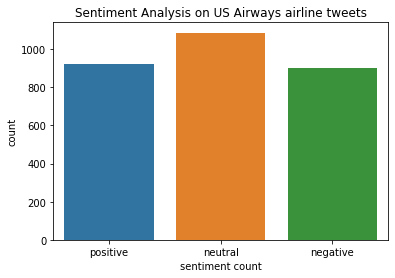

In [176]:
sns.countplot(x=us["sentiment"],)
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on US Airways airline tweets")
plt.show()

# American Airline Tweets

In [171]:
american=df[df['airline'].str.contains('American')]

In [173]:
american['sentiment'].value_counts()

neutral     1076
positive     969
negative     714
Name: sentiment, dtype: int64

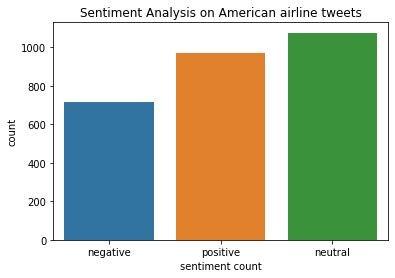

In [175]:
sns.countplot(x=american["sentiment"],)
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on American airline tweets")
plt.show()

# Southwest airline tweets

In [191]:
sw=df[df['airline'].str.contains('Southwest')]

In [179]:
sw['sentiment'].value_counts()

positive    980
neutral     946
negative    494
Name: sentiment, dtype: int64

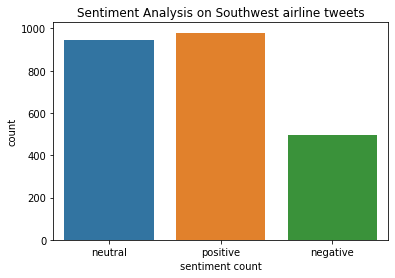

In [178]:
sns.countplot(x=sw["sentiment"],)
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on Southwest airline tweets")
plt.show()

# Delta airlines tweets

In [193]:
D=df[df['airline'].str.contains('Delta')]

In [194]:
D['sentiment'].value_counts()

positive    944
neutral     888
negative    390
Name: sentiment, dtype: int64

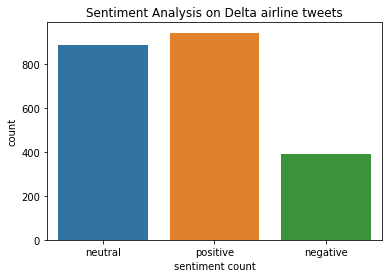

In [195]:
sns.countplot(x=D["sentiment"],)
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on Delta airline tweets")
plt.show()

# virgin america airline tweets

In [199]:
va=df[df['airline'].str.contains('Virgin America')]

In [200]:
va['sentiment'].value_counts()

positive    219
neutral     205
negative     80
Name: sentiment, dtype: int64

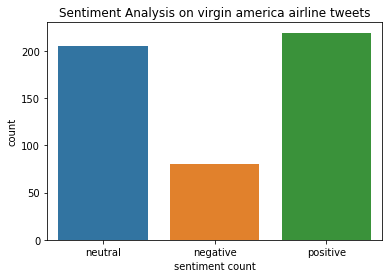

In [201]:
sns.countplot(x=va["sentiment"],)
plt.xlabel("sentiment count")
plt.title("Sentiment Analysis on virgin america airline tweets")
plt.show()